## Importação das bibliotecas a serem utilizadas


In [83]:
import keras 
import tensorflow
from yahooquery import Ticker
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.graph_objects as go
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

### Definição de datas para filtro do dataframe da API: Datas de janeiro de 2019 até maio de 2021


In [84]:
start = '2019-01-01'
end = '2021-05-01'

## Definição de empresas que será utilizada no exemplo do nosso trabalho.

##### Que são : Oi, Vale , Magazine Luiza e Petrobrás

In [85]:
AcoesBovespa = ['oibr3.sa','petr3.sa','mglu3.sa','vale3.sa']

# Ticker faz a interligação do Jupyter com a API do YahooFinance.

In [86]:
Acoes = Ticker(AcoesBovespa)

### É também obtido as principais informações referentes a empresas listadas na Bovespa (B3)

In [87]:
Dados_Empresas = Acoes.asset_profile
Dados_Empresas

{'oibr3.sa': {'address1': 'Rua do Lavradio, 71 â\x80\x93 2Âº andar',
  'city': 'Rio de Janeiro',
  'state': 'RJ',
  'zip': '20230-07',
  'country': 'Brazil',
  'website': 'http://www.oi.com.br',
  'industry': 'Telecom Services',
  'sector': 'Communication Services',
  'longBusinessSummary': 'Oi S.A., a switched fixed-line telephony services concessionaire, provides telecommunication services in Brazil. The company offers fixed telephony services, including voice, data communication, and pay TV services; local and intraregional long-distance carrier services; domestic and international long-distance services; mobile telecommunications and corporate solutions; and maintenance, and repair services. It also provides call center and telemarketing, Internet, network, and Wi-Fi Internet services; and financial, and payment and credit system services. In addition, the company engages in the investment management activities, as well as raising funds in the international market. It serves reside

### É feito o tratamento dos dados, por que os dados vindo a partir da api é um DICT e não ficaria tão legível alguns campos, então por isso é transformado em um dataframe. 

In [88]:
Dados_Empresas = pd.DataFrame.from_dict(Dados_Empresas)
Dados_Empresas

,oibr3.sa,petr3.sa,mglu3.sa,vale3.sa
address1,"Rua do Lavradio, 71 â 2Âº andar","Avenida RepUblica do Chile, 65","Rua Arnulfo de Lima, nÂº 2.385",Praia de Botafogo 186
city,Rio de Janeiro,Rio De Janeiro,Franca,Rio De Janeiro
state,RJ,RJ,SP,RJ
zip,20230-07,20031-912,14403-471,22250-145
country,Brazil,Brazil,Brazil,Brazil
website,http://www.oi.com.br,http://petrobras.com.br/pt,http://www.magazineluiza.com.br,http://www.vale.com
industry,Telecom Services,Oil & Gas Integrated,Specialty Retail,Other Industrial Metals & Mining
sector,Communication Services,Energy,Consumer Cyclical,Basic Materials
longBusinessSummary,"Oi S.A., a switched fixed-line telephony servi...",PetrÃ³leo Brasileiro S.A. - Petrobras produce ...,Magazine Luiza S.A. engages in the retail sale...,"Vale S.A., together with its subsidiaries, pro..."
fullTimeEmployees,13305,49050,40000,74316


### Verificação para ver se posui algum campo vazio(nan) ou null referente aos dados das empresas e checando os nomes das colunas e tipos que todas possuem.

In [89]:
Dados_Empresas.columns


Index(['oibr3.sa', 'petr3.sa', 'mglu3.sa', 'vale3.sa'], dtype='object')

In [90]:
Dados_Empresas.dtypes

oibr3.sa    object
petr3.sa    object
mglu3.sa    object
vale3.sa    object
dtype: object

In [91]:
Dados_Empresas.shape

(20, 4)

In [92]:
Dados_Empresas.isna().any()

oibr3.sa     True
petr3.sa    False
mglu3.sa     True
vale3.sa    False
dtype: bool

In [93]:
Dados_Empresas.isnull().any()

oibr3.sa     True
petr3.sa    False
mglu3.sa     True
vale3.sa    False
dtype: bool

In [94]:
Acoes = Ticker(AcoesBovespa)

In [95]:
Acoes.history(start = start , end = end)

volume        high        open         low  \
symbol   date                                                         
oibr3.sa 2019-01-02  11757400.0    1.280000    1.250000    1.240000   
         2019-01-03  21386900.0    1.410000    1.280000    1.270000   
         2019-01-04  21348500.0    1.490000    1.460000    1.370000   
         2019-01-07   7438200.0    1.470000    1.430000    1.390000   
         2019-01-08  23400900.0    1.430000    1.420000    1.320000   
...                         ...         ...         ...         ...   
vale3.sa 2021-04-26  16807500.0  110.690002  109.949997  108.150002   
         2021-04-27  24113300.0  110.599998  108.879997  108.519997   
         2021-04-28  20570600.0  112.430000  110.559998  109.330002   
         2021-04-29  19724300.0  112.949997  112.190002  110.889999   
         2021-04-30  36888200.0  111.559998  110.989998  109.019997   

                          close    adjclose  dividends  splits  
symbol   date                                                   
oibr3.sa 2019-01-02    1.260000    1.260000        0.0     0.0  
         2019-01-03    1.410000    1.410000        0.0     0.0  
         2019-01-04    1.410000    1.410000        0.0     0.0  
         2019-01-07    1.420000    1.420000        0.0     0.0  
         2019-01-08    1.380000    1.380000        0.0     0.0  
...                         ...         ...        ...     ...  
vale3.sa 2021-04-26  108.570000  108.570000        0.0     0.0  
         2021-04-27  110.120003  110.120003        0.0     0.0  
         2021-04-28  111.919998  111.919998        0.0     0.0  
         2021-04-29  111.949997  111.949997        0.0     0.0  
         2021-04-30  109.019997  109.019997        0.0     0.0  

[2292 rows x 8 columns]

In [96]:
Acoes = Ticker(AcoesBovespa)
Acoes = Acoes.history(start = start , end = end)
Acoes

volume        high        open         low  \
symbol   date                                                         
oibr3.sa 2019-01-02  11757400.0    1.280000    1.250000    1.240000   
         2019-01-03  21386900.0    1.410000    1.280000    1.270000   
         2019-01-04  21348500.0    1.490000    1.460000    1.370000   
         2019-01-07   7438200.0    1.470000    1.430000    1.390000   
         2019-01-08  23400900.0    1.430000    1.420000    1.320000   
...                         ...         ...         ...         ...   
vale3.sa 2021-04-26  16807500.0  110.690002  109.949997  108.150002   
         2021-04-27  24113300.0  110.599998  108.879997  108.519997   
         2021-04-28  20570600.0  112.430000  110.559998  109.330002   
         2021-04-29  19724300.0  112.949997  112.190002  110.889999   
         2021-04-30  36888200.0  111.559998  110.989998  109.019997   

                          close    adjclose  dividends  splits  
symbol   date                                                   
oibr3.sa 2019-01-02    1.260000    1.260000        0.0     0.0  
         2019-01-03    1.410000    1.410000        0.0     0.0  
         2019-01-04    1.410000    1.410000        0.0     0.0  
         2019-01-07    1.420000    1.420000        0.0     0.0  
         2019-01-08    1.380000    1.380000        0.0     0.0  
...                         ...         ...        ...     ...  
vale3.sa 2021-04-26  108.570000  108.570000        0.0     0.0  
         2021-04-27  110.120003  110.120003        0.0     0.0  
         2021-04-28  111.919998  111.919998        0.0     0.0  
         2021-04-29  111.949997  111.949997        0.0     0.0  
         2021-04-30  109.019997  109.019997        0.0     0.0  

[2292 rows x 8 columns]

In [97]:
Acoes.columns

Index(['volume', 'high', 'open', 'low', 'close', 'adjclose', 'dividends',
       'splits'],
      dtype='object')

In [98]:
Acoes.shape

(2292, 8)

In [99]:
Acoes.mean()

volume       5.617673e+07
high         2.577082e+01
open         2.539804e+01
low          2.499775e+01
close        2.538589e+01
adjclose     2.390088e+01
dividends    4.566073e-03
splits       5.235602e-03
dtype: float64

In [100]:
Acoes.dtypes

volume       float64
high         float64
open         float64
low          float64
close        float64
adjclose     float64
dividends    float64
splits       float64
dtype: object

In [101]:
Acoes.isnull().any()

volume       False
high         False
open         False
low          False
close        False
adjclose     False
dividends    False
splits       False
dtype: bool

In [102]:
Acoes.isna().any()

volume       False
high         False
open         False
low          False
close        False
adjclose     False
dividends    False
splits       False
dtype: bool

In [103]:
Dados_Empresas.isna().any()

oibr3.sa     True
petr3.sa    False
mglu3.sa     True
vale3.sa    False
dtype: bool

## É removido o groupby para pegar os campos mais importantes do dataframe.

In [104]:
Acoes = Acoes.reset_index()
Acoes

Acoes = Acoes[['symbol','date','low','close','open','high']]

Acoes

,symbol,date,low,close,open,high
0,oibr3.sa,2019-01-02,1.240000,1.260000,1.250000,1.280000
1,oibr3.sa,2019-01-03,1.270000,1.410000,1.280000,1.410000
2,oibr3.sa,2019-01-04,1.370000,1.410000,1.460000,1.490000
3,oibr3.sa,2019-01-07,1.390000,1.420000,1.430000,1.470000
4,oibr3.sa,2019-01-08,1.320000,1.380000,1.420000,1.430000
...,...,...,...,...,...,...
2287,vale3.sa,2021-04-26,108.150002,108.570000,109.949997,110.690002
2288,vale3.sa,2021-04-27,108.519997,110.120003,108.879997,110.599998
2289,vale3.sa,2021-04-28,109.330002,111.919998,110.559998,112.430000
2290,vale3.sa,2021-04-29,110.889999,111.949997,112.190002,112.949997


### É selecionado os campos mais importantes do dataframe e também renomeados.

In [105]:
Acoes = Acoes.rename(columns={'symbol': 'Símbolo','date': 'Data','low': 'Baixa','close':'Fechamento','open':'Abertura','high':'Alta'})
Acoes

,Símbolo,Data,Baixa,Fechamento,Abertura,Alta
0,oibr3.sa,2019-01-02,1.240000,1.260000,1.250000,1.280000
1,oibr3.sa,2019-01-03,1.270000,1.410000,1.280000,1.410000
2,oibr3.sa,2019-01-04,1.370000,1.410000,1.460000,1.490000
3,oibr3.sa,2019-01-07,1.390000,1.420000,1.430000,1.470000
4,oibr3.sa,2019-01-08,1.320000,1.380000,1.420000,1.430000
...,...,...,...,...,...,...
2287,vale3.sa,2021-04-26,108.150002,108.570000,109.949997,110.690002
2288,vale3.sa,2021-04-27,108.519997,110.120003,108.879997,110.599998
2289,vale3.sa,2021-04-28,109.330002,111.919998,110.559998,112.430000
2290,vale3.sa,2021-04-29,110.889999,111.949997,112.190002,112.949997


### Função que gera um gráfico de uma ação durante um período 

In [106]:
def plotHistorico (Acao):
    fig = go.Figure(data=[go.Candlestick(x=Acao['Data'],
                open=Acao['Abertura'],
                high=Acao['Alta'],
                low=Acao['Baixa'],
                close=Acao['Fechamento'])])

    return fig.show()


In [107]:
Oibr3 = Acoes[Acoes.Símbolo == 'oibr3.sa']
Vale3 = Acoes[Acoes.Símbolo == 'vale3.sa']
MagazineLuiza = Acoes[Acoes.Símbolo == 'mglu3.sa']
Petrobras = Acoes[Acoes.Símbolo == 'petr3.sa']

In [108]:
Oibr3

,Símbolo,Data,Baixa,Fechamento,Abertura,Alta
0,oibr3.sa,2019-01-02,1.24,1.26,1.25,1.28
1,oibr3.sa,2019-01-03,1.27,1.41,1.28,1.41
2,oibr3.sa,2019-01-04,1.37,1.41,1.46,1.49
3,oibr3.sa,2019-01-07,1.39,1.42,1.43,1.47
4,oibr3.sa,2019-01-08,1.32,1.38,1.42,1.43
...,...,...,...,...,...,...
568,oibr3.sa,2021-04-26,1.76,1.81,1.78,1.82
569,oibr3.sa,2021-04-27,1.72,1.74,1.81,1.82
570,oibr3.sa,2021-04-28,1.72,1.77,1.74,1.80
571,oibr3.sa,2021-04-29,1.72,1.75,1.76,1.79


In [109]:
plotHistorico(Oibr3)

In [110]:
Vale3

,Símbolo,Data,Baixa,Fechamento,Abertura,Alta
1719,vale3.sa,2019-01-02,49.790001,51.090000,50.009998,51.369999
1720,vale3.sa,2019-01-03,48.400002,49.000000,50.799999,50.939999
1721,vale3.sa,2019-01-04,49.820000,52.189999,49.820000,52.450001
1722,vale3.sa,2019-01-07,51.720001,51.910000,52.869999,53.650002
1723,vale3.sa,2019-01-08,51.619999,52.410000,52.200001,52.799999
...,...,...,...,...,...,...
2287,vale3.sa,2021-04-26,108.150002,108.570000,109.949997,110.690002
2288,vale3.sa,2021-04-27,108.519997,110.120003,108.879997,110.599998
2289,vale3.sa,2021-04-28,109.330002,111.919998,110.559998,112.430000
2290,vale3.sa,2021-04-29,110.889999,111.949997,112.190002,112.949997


In [111]:
plotHistorico(Vale3)

In [112]:
MagazineLuiza

,Símbolo,Data,Baixa,Fechamento,Abertura,Alta
1146,mglu3.sa,2019-01-02,5.594687,5.812187,5.638125,5.812187
1147,mglu3.sa,2019-01-03,5.605000,5.750000,5.780937,5.796562
1148,mglu3.sa,2019-01-04,5.573437,5.575000,5.751562,5.760937
1149,mglu3.sa,2019-01-07,5.539687,5.661562,5.562500,5.702500
1150,mglu3.sa,2019-01-08,5.593750,5.615937,5.673437,5.702812
...,...,...,...,...,...,...
1714,mglu3.sa,2021-04-26,21.500000,21.709999,21.610001,21.809999
1715,mglu3.sa,2021-04-27,20.930000,20.950001,21.600000,21.650000
1716,mglu3.sa,2021-04-28,20.580000,20.650000,20.940001,21.100000
1717,mglu3.sa,2021-04-29,19.910000,20.260000,20.629999,20.670000


In [113]:
plotHistorico(MagazineLuiza)

In [114]:
Petrobras

,Símbolo,Data,Baixa,Fechamento,Abertura,Alta
573,petr3.sa,2019-01-02,25.100000,26.650000,25.410000,26.950001
574,petr3.sa,2019-01-03,26.280001,27.200001,26.650000,27.430000
575,petr3.sa,2019-01-04,27.070000,27.510000,27.240000,27.559999
576,petr3.sa,2019-01-07,27.549999,28.400000,27.559999,29.100000
577,petr3.sa,2019-01-08,28.110001,28.250000,28.650000,28.770000
...,...,...,...,...,...,...
1141,petr3.sa,2021-04-26,23.180000,23.299999,23.350000,23.580000
1142,petr3.sa,2021-04-27,22.620001,22.740000,23.350000,23.639999
1143,petr3.sa,2021-04-28,22.930000,23.549999,22.959999,23.620001
1144,petr3.sa,2021-04-29,22.860001,23.080000,23.690001,23.900000


In [115]:
plotHistorico(Petrobras)

### Utilizaremos os dados de fechamento, por ter um maior grau de importância para o nosso objetivo final de trabalho¶

In [116]:
def Treino(Acao):
    fechamento = Oibr3.Fechamento
    treinamento = fechamento[0:int(len(fechamento)*0.80)]
    return treinamento


In [117]:
fechamento = Treino(Oibr3)
scl = MinMaxScaler()
scl.fit(fechamento.values.reshape(-1,1))
fechamento =scl.transform(fechamento.values.reshape(-1,1))


## Função que faz o processamento dos dados de fechamento do dia.

In [118]:
def processarDados(data,lookback):
    X,Y = [],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback),0])
        Y.append(data[(i+lookback),0])
    return np.array(X),np.array(Y) 

In [119]:
lookback=10
X,y = processarDados(fechamento,lookback)
X_treino,X_teste = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_treino,y_teste = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]

In [127]:
modeloSequencial = Sequential()
modeloSequencial.add(LSTM(256,input_shape=(lookback,1)))
modeloSequencial.add(Dense(1))
modeloSequencial.compile(optimizer='adam',loss='mse')
X_treino = X_treino.reshape((X_treino.shape[0],X_treino.shape[1],1))
X_teste = X_teste.reshape((X_teste.shape[0],X_teste.shape[1],1))
  
history = modeloSequencial.fit(X_treino,y_treino,epochs=300,validation_data=(X_teste,y_teste),shuffle=False)
modeloSequencial.summary()

Epoch 1/300
13/13 [==============================] - 3s 68ms/step - loss: 0.1694 - val_loss: 0.0021
Epoch 2/300
13/13 [==============================] - 0s 24ms/step - loss: 0.0074 - val_loss: 0.0022
Epoch 3/300
13/13 [==============================] - 0s 27ms/step - loss: 0.0060 - val_loss: 0.0064
Epoch 4/300
13/13 [==============================] - 0s 26ms/step - loss: 0.0069 - val_loss: 0.0024
Epoch 5/300
13/13 [==============================] - 0s 22ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 6/300
13/13 [==============================] - 0s 23ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 7/300
13/13 [==============================] - 0s 24ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 8/300
13/13 [==============================] - 0s 23ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 9/300
13/13 [==============================] - 0s 28ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 10/300
13/13 [==============================] - 0s 24ms/step - loss: 0.0056 - val_loss: 0.0046

Text(0.5, 1.0, 'Testando os dados')

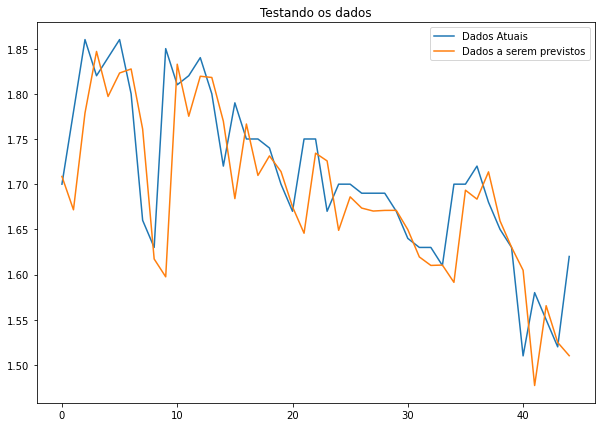

In [123]:
plt.figure(figsize=(10,7))
Xt = modeloSequencial.predict(X_teste)
plt.plot(scl.inverse_transform(y_teste.reshape(-1,1)), label="Dados Atuais")
plt.plot(scl.inverse_transform(Xt), label="Dados a serem previstos")
plt.legend()
plt.title("Testando os dados")

Text(0.5, 1.0, 'Treinando os dados')

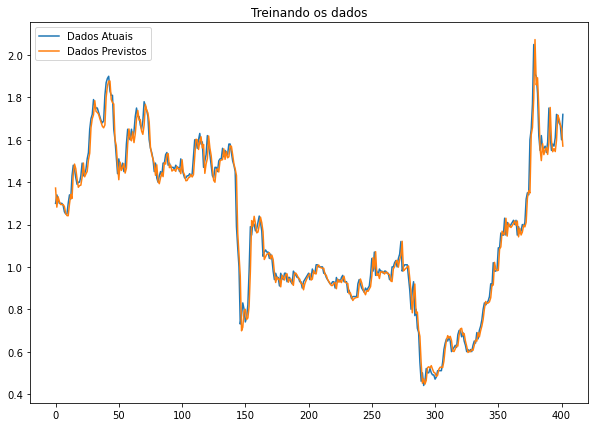

In [124]:
plt.figure(figsize=(10,7))
Xt = modeloSequencial.predict(X_treino)
plt.plot(scl.inverse_transform(y_treino.reshape(-1,1)), label="Dados Atuais")
plt.plot(scl.inverse_transform(Xt), label="Dados Previstos")
plt.legend()
plt.title("Treinando os dados")